# Data Wrangling with MongoDB: Wrangle OpenStreetMap Data

> Udacity Data Analyst Nanodegree: _Project 3_
>
> Author: _Ke Zhang_
>
> Submission Date: _2017-04-02_ (Revision 2)

## Abstract

Mannheim is my hometown, so it's in my own interest to learn more about this beautiful city.

**Map Area of Interest**:
- Location: Mannheim, Baden-Württemberg, Germany
- Bounding-Box of Mannheim:
> "bbox": [
>     8.42284118611036,
>     49.41108149999997,
>     8.60025536544691,
>     49.56820147348702
> ]
- [Mannheim on OpenStreetMap](https://tools.wmflabs.org/wiwosm/osm-on-ol/kml-on-ol.php?lang=de&uselang=de&params=49.483611111111_N_8.4630555555556_E_region%3ADE-BW_type%3Acity%28305780%29&title=Mannheim&zoom=10&lat=49.50051&lon=8.50208&layers=B0000000FTTTF)
- [Mannheim on Wikipedia](https://en.wikipedia.org/wiki/Mannheim)
- [Mannheim on OpenStreetMap Wiki](http://wiki.openstreetmap.org/wiki/Mannheim)

## Content

- [Data Preparation and Preview](#Data-Preparation-and-Preview)
- [Problems Encountered in the Map](#Problems-Encountered-in-the-Map)
    - [**Problem 1**: Typographical errors in city names](#Problem-1:-Typographical-errors-in-city-names)
    - [**Problem 2**: Inconsistent provider names](#Problem-2:-Inconsistent-operator-names)
    - [**Problem 3**: Existing fixme, todo and note entries](#Problem-3:-Existing-fixme,-todo-and-note-entries)
    - [**Problem 4**: Non-numeric max speed presentation](#Problem-4:-Non-numeric-max-speed-representation)
    - [**Problem 5**: Street names without using the German 'ß'](#Problem-5:-Street-names-without-using-the-German-%27%C3%9F%27)
- [Data Overview](#Data-Overview)
    - [Import](#Import)
    - [Exploration](#Exploration)
- [Additional Ideas](#Additional-Ideas)
    - [**Idea 1**: Top cuisines](#Idea-1:-Top-cuisines)
    - [**Idea 2**: Popular fast food](#Idea-2:-Popular-fast-food)
    - [**Idea 3**: Recently opened restaurants](#Idea-3:-Recently-opened-restaurants)
    - [**Idea 4**: Postcode areas without kindergartens](#Idea-4:-Postcodes-without-kindergartens)
    - [**Idea 5**: User activities over years](#Idea-5:-User-activities-over-years)
- [Conclusion](#Conclusion)

## Data Preparation and Preview

**Map Data Set**

* The Map OSM file of Mannheim (Germany) was downladed via [MapZen: Custom Extract Service](https://mapzen.com)
    * Extraction Date: 2017-03-31
* The sample OSM file was exported using the 'sample.py' script (see [Data Overview](Data-Overview)

**Quick Exploration**:

We used the sample OSM file for the quick exploration.

* **Tag-Names** in the map data using the 'mapparser.py' script:
    * There are 7 tags found in the sample osm file. Frequencies of the tags are as follows:

| Tag | # absolute | # relative |
|-----|------------|------------|
| member | 2068 | 2% |
| nd | 41329 | 37% |
| node | 29024 | 26% |
| osm | 1 | 0% |
| relation | 158 | 0% |
| tag | 32454 | 30% |
| way | 6179 | 6% |

* **Tag-Keys** in Tag elements using the 'tags.py' script:

| Key | # absolute | # relative |
|-----|------------|------------|
| lower | 18869 | 58% |
| lower_colon | 12829 | 40% |
| other | 756 | 2% |
| problemchars | 0 | 0% |

* **Unique contributing users** using the 'users.py' script:
    * Unique user IDs: 500


In [1]:
# load custom script file for this project
import p3_osm_mannheim as prj
import pandas as pd

# initialize plot context and global configurations
%matplotlib inline

# initialize global imports and settings
MAP_FILE = prj.get_absolute_file_path('./data/raw_xml_mannheim_germany.osm')
SAMPLE_FILE = prj.get_absolute_file_path('./data/sample.osm')
OSM_DB = 'osm'
MAP_COLLECTION = 'mannheim'
SAMPLE_COLLECTION = 'mannheim_sample'

In [2]:
%%timeit -n1 -r1

# exports sample osm file (k=30) and timeit
%run ./sample.py -i {MAP_FILE} -o {SAMPLE_FILE} -k 30

1 loop, best of 1: 1min 50s per loop


Absolute frequencies of 'Tag':
member       2068
nd          41329
node        29024
osm             1
relation      158
tag         32454
way          6179
Name: Tag, dtype: int64

Relative frequencies of 'Tag' [%]:
member       1.859495
nd          37.162022
node        26.097668
osm          0.000899
relation     0.142070
tag         29.181840
way          5.556005
Name: Tag, dtype: float64



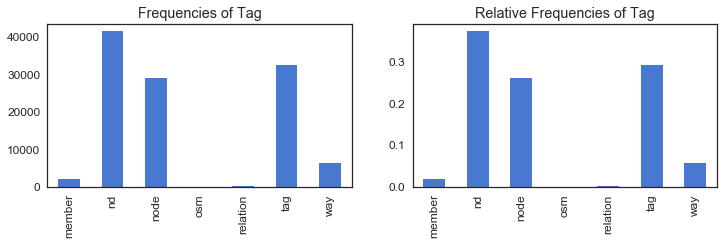

In [3]:
# parses the sample map file and find out tag names and their distributions
import mapparser

tags = mapparser.count_tags(SAMPLE_FILE)
tags_df = prj.to_dataframe('Tag', tags)
prj.print_frequencies(tags_df)
prj.plot_frequencies(tags_df)

Absolute frequencies of 'Key':
lower           18869
lower_colon     12829
other             756
problemchars        0
Name: Key, dtype: int64

Relative frequencies of 'Key' [%]:
lower           58.140753
lower_colon     39.529796
other            2.329451
problemchars     0.000000
Name: Key, dtype: float64



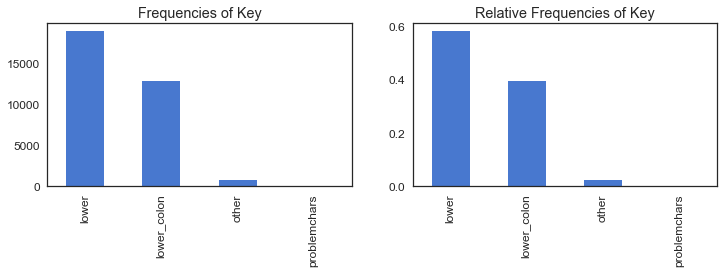

In [4]:
# explore "k" value for each "<tag>" and check for any potential problems:
# - "lower", for tags that contain only lowercase letters and are valid,
# - "lower_colon", for otherwise valid tags with a colon in their names,
# - "problemchars", for tags with problematic characters, and
# - "other", for other tags that do not fall into the other three categories.
import tags

keys = tags.process_map(SAMPLE_FILE)
keys_df = prj.to_dataframe('Key', keys)
prj.print_frequencies(keys_df)
prj.plot_frequencies(keys_df)

In [5]:
# explore "uid" to find out how many unique users have contributed to the map
import users

unique_users = users.process_map(SAMPLE_FILE)
print('Unique user uids: {0}'.format(len(unique_users)))

Unique user uids: 500


In [6]:
# list unique postcodes in the data set
df = prj.count_unique_items(SAMPLE_FILE, 
                            lambda t: t.attrib['k'] == 'addr:postcode', 
                            df_name = 'Postcode')
df

,Postcode
67059,17
67061,54
67063,23
67065,32
67067,10
67069,22
67117,3
67122,13
67141,16
68159,39


In [7]:
# list unique country codes in the data set
df = prj.count_unique_items(SAMPLE_FILE, 
                            lambda t: t.attrib['k'] == 'addr:country', 
                            df_name = 'CountryCode')
df

,CountryCode
DE,1500


In [8]:
# list natural landscapes or trees in the data set
df = prj.count_unique_items(SAMPLE_FILE, 
                            lambda t: t.attrib['k'] == 'natural', 
                            df_name = 'CountryCode')
df

,CountryCode
beach,1
grassland,3
heath,3
peak,1
sand,2
scrub,61
spring,1
tree,152
water,4
wood,1


## Problems Encountered in the Map

* [**Problem 1**: Typographical errors in city names](#Problem-1:-Typographical-errors-in-city-names)
    * e.g. 'Vierheim' indead of 'Viernheim'
* [**Problem 2**: Inconsistent provider names](#Problem-2:-Inconsistent-operator-names)
    * e.g. 'Deutsche Telekom' vs 'Deutsche Telekom AG'
* [**Problem 3**: Existing fixme, todo and note entries](#Problem-3:-Existing-fixme,-todo-and-note-entries)
    * e.g. 'please check again'
* [**Problem 4**: Non-numeric max speed presentation](#Problem-4:-Non-numeric-max-speed-representation)
    * e.g. 'walk' instead of 5
* [**Problem 5**: Street names without using the German 'ß'](#Problem-5:-Street-names-without-using-the-German-%27%C3%9F%27)
    * e.g. 'Gross-Gerauer Strasse' instead of 'Gross-Gerauer Straße'

### **Problem 1**: Typographical errors in city names

In the list of the cities there is a common typo for the citiy 'Viernheim'. Instead of 'Viernheim' the name 'Vierheim' is used 2 times in the sample data set. (Note: The map area contains neighbour cities of Mannheim as well.)

* Examples of typographical errors:
    * 'Viernheim' vs 'Vierheim'
    
* Possible solutions
    * replace these typographical errors

In [9]:
# list unique cities in the data set
df = prj.count_unique_items(SAMPLE_FILE, 
                            lambda t: t.attrib['k'] == 'addr:city', 
                            df_name = 'CityName')
df

,CityName
Altrip,13
Brühl,87
Edingen,1
Edingen-Nackarhausen,1
Edingen-Neckarhausen,49
Eppelheim,8
Heddesheim,73
Heidelberg,1
Ilvesheim,63
Ladenburg,89


### **Problem 2**: Inconsistent operator names

In the sample data set a considerable number of cases are found where the operator names are inconsistent. (Operators in the city are mostly transportation, communication or energy corparations.) Some of names are listed as abbreviations. Others are somehow incomplete (e.g. does not contain the company type 'SE', 'AG' or 'GmbH')

* Examples of inconsistent operator names:
    * 'BASF' vs 'BASF SE'
    * 'DB Netz' vs 'DB Netz AG'
    * 'DB Post' vs 'DB Post AG'
    * 'Deutsche Telekom' vs 'Deutsche Telekom AG'
    * 'EnBW' vs 'EnBW AG'
    * 'Hall' vs 'Hall Tabakwaren'
    * 'RNV' vs 'RNV GmbH' vs 'Rhein-Neckar-Verkehr GmbH'
    * 'MVV' vs 'MVV Energie' vs 'MVV Energie AG'

* Possible Solutions:
    * standardize the inconsistent names using the most official name

In [10]:
# list unique operators (transportation, communication, energy etc.) in the data set
df = prj.count_unique_items(SAMPLE_FILE, 
                            lambda t: t.attrib['k'] == 'operator', 
                            df_name = 'Operator')
df

,Operator
Angel Panevski,1
Antonina Abate,1
Arthur Schuller e.K.,1
Autobahnmeisterei,2
Avendi,1
BASF,20
BASF SE,2
BB Bank,1
Badenwerk,1
Bettina Dietz,1


### **Problem 3**: Existing fixme, todo and note entries

Some nodes or ways contain fixme, todo or note entries which indicates that there are some unfinished work to do. We could check the actual node and assure if the entry is still valid by looking at its last modified timestamp.

* Examples of FixMe or Notes:
    * 'Welcher Typ?'
    * 'please check again'
    * 'continue'
    
* Possible Solutions:
    * manually check if the todo entry is still valid
    * contact the last contributed users to let them recheck those points

In [11]:
# list of fixmes in the data set
df = prj.count_unique_items(SAMPLE_FILE, 
                            lambda t: 'fixme' in t.attrib['k'].lower(), 
                            df_name = 'FixMe')
df

,FixMe
AutoHET,1
Hausnummer,1
Hausnummern,2
"Hundeplatz, wie taggen?",1
Höhe geschätzt,1
Ist der operator jetzt die MVV Energie AG?,1
"Nur grober verlauf, von Bing abgezeichnet",2
Position ungenau,1
"Tafel ""Bremseinsatzpunkt""",1
besseres Tag für ausgewachene Bauunternehmen im Tiefbau suchen,1


In [12]:
# list of notes in the data set
df = prj.count_unique_items(SAMPLE_FILE, 
                            lambda t: 'note' in t.attrib['k'].lower(), 
                            df_name = 'Note')
df

,Note
"""A"",""–""(F0),""·""(F4),""\""(F3)",1
"""Privatweg. Zufahrt nur für Berechtigte""",1
(ehemaliges?) Munitionslagerhaus,2
1969-09-16 offizielle Eröffnung,1
2015-11-04: 100 -> 70,2
2015-11-04: 50 -> 30,1
2015-11-04: 70 -> 50,1
Adresse ehemals Thüringer Straße 118,1
Anzeige der Linienkennung,1
Ausfahrt jederzeit möglich,1


### **Problem 4**: Non-numeric max speed representation

The attribute 'maxspeed' in 'way' tags defines the max speed on streets and should only contain numeric values such as 5 or 120. 

* Example non-numeric max speeds:
    * 'none'
    * 'walk'
    
* Possible solutions:
    * replace 'walk' with the official walking speed definition in Germany which is 5km/h
    * replce 'none' with 200km/h since the default speed limit on German motorways is 120km/h
    * rename to 'maxspeed:note' or add as 'todo' tag

In [13]:
# list of max speeds in the data set
df = prj.count_unique_items(SAMPLE_FILE, 
                            lambda t: 'maxspeed' == t.attrib['k'], 
                            df_name = 'MaxSpeed')
df

,MaxSpeed
10,17
100,10
110,2
120,8
130,1
15,1
160,5
20,10
25,1
30,182


### **Problem 5**: Street names without using the German 'ß'

In German we have umlauts (ä, ö, ü) and sharp s (ß) additionally to the roman letters. The German translation for street is for example 'Straße'. In times when typing the umlauts is not possible, we sometimes use their replacements:
    * 'ä' -> 'ae'
    * 'ö' -> 'oe'
    * 'ü' -> 'ue'
    * 'ß' -> 'ss'

* In the sample data there are places where the replacement 'ss' is used for 'ß' in street names:
    * 'Gross-Gerauer Strasse' instead of 'Gross-Gerauer Straße'
    
* Possible solutions:
    * replace 'Strasse' with 'Straße'

In [14]:
# list street names without using the German 'ß' in the data set
df = prj.count_unique_items(SAMPLE_FILE, 
                            lambda t: 'strasse' in t.attrib['v'].lower(), 
                            df_name = 'IncorrectStreetName',
                            tags = ['way', 'relation']
                           )
df

,IncorrectStreetName
Rheinau Antwerpener Strasse,1
Rheinau Pigagestrasse,1


## Data Overview

In this section we'll import the OSM data into the MongoDB database and use simple queries to gather basic statistics and some interesting facts.

**File Size**

|             | OSM File | XML File Size | JSON File Size
|-------------|------|------|
| Map Data | raw_xml_mannheim_germany.osm | 217MiB | 252MiB |
| Sample Data | sample.osm | 7.3MiB | 8.4MiB |

In [15]:
# print osm file sizes
print("Map File:\n- xml={0},\n- json={1}\n- path={2}\n".format(
    prj.format_size(prj.get_file_size(MAP_FILE)),
    prj.format_size(prj.get_file_size(MAP_FILE + '.json')),
    MAP_FILE
))
print("Sample File:\n- xml={0},\n- json={1}\n- path={2}\n".format(
    prj.format_size(prj.get_file_size(SAMPLE_FILE)),
    prj.format_size(prj.get_file_size(SAMPLE_FILE + '.json')),
    SAMPLE_FILE
))

Map File:
- xml=216.9MiB,
- json=252.3MiB
- path=C:\Users\ke\Documents\p3_osm_mannheim\data\raw_xml_mannheim_germany.osm

Sample File:
- xml=7.3MiB,
- json=8.4MiB
- path=C:\Users\ke\Documents\p3_osm_mannheim\data\sample.osm



### Import

Here are the steps how we prepared the data import into MongoDB by converting the OSM XML file to json format using 'data.py' script and then import the data with the help of the 'mongoimport' tool.

* Import Steps:
    * Convert XML to JSON: 
        * Test and improve 'data.py' script using sample OSM file to audit and convert the data to JSON format
> data.py -i sample.osm
        * Convert the original map OSM file to JSON format using 'data.py' script
> data.py -i raw_xml_mannheim_germany.osm
    * Import JSON into MongoDB:
        * Import Sample JSON data as the 'mannheim_sample' collection to check data format and for quick sample queries
> mongoimport --db osm --collection mannheim_sample --file sample.osm.json
        * Import map JSON data as the 'mannheim' collection
> mongoimport --db osm --collection mannheim --file raw_xml_mannheim_germany.osm.json

In [16]:
%%timeit -n1 -r1

# converts sample.osm to sample.osm.json
%run ./data.py -i {SAMPLE_FILE}

1 loop, best of 1: 1.43 s per loop


In [17]:
# import json file into mongodb

cmd = 'mongoimport --db {0} --collection {1} --file {2}.json'.format(
    OSM_DB,
    SAMPLE_COLLECTION,
    SAMPLE_FILE
)
print(cmd)
# !cmd

mongoimport --db osm --collection mannheim_sample --file C:\Users\ke\Documents\p3_osm_mannheim\data\sample.osm.json


### Exploration

After the map JSON file of Mannheim is successfully imported into MongoDB now. Let's begin to explore our data.

* Some interesting results in the imported Mannheim collection:

|         | count |
|---------|-------|
| documents | 1056066 |
| nodes | 870680 |
| ways | 185267 |
| users | 1204 |
| trees | 4521 |
| tram stops | 194 |
| car sharing stations | 75 |
| fire stations | 33 |
| fountains | 73 |
| kindergartens | 190 |
| schools | 208 |
| universities and colleges | 61 |

In [18]:
# create mongodb connection to our osm database
mannheim = prj.connect_to_mongodb(OSM_DB, MAP_COLLECTION)
mannheim

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), u'osm'), u'mannheim')

In [19]:
# total number of documents
print('number of documents: {}'.format(
    mannheim.find().count()
))

number of documents: 1056066


In [20]:
# total number of nodes
print('number of nodes: {}'.format(
    mannheim.find({'type': 'node'}).count()
))

number of nodes: 870680


In [21]:
# total number of ways
print('number of ways: {}'.format(
    mannheim.find({'type': 'way'}).count()
))

number of ways: 185267


In [22]:
# total number of distinct contributing users
print('number of contributing users: {}'.format(
    len(mannheim.distinct('created.user'))
))

number of contributing users: 1204


In [23]:
# total number of registered trees
print('number of trees: {}'.format(
    mannheim.find({'natural': 'tree'}).count()
))

number of trees: 4521


In [24]:
# total number of tram stops
print('number of tram stops: {}'.format(
    mannheim.find({'railway': 'tram_stop'}).count()
))

number of tram stops: 194


In [25]:
# list of amenities
print('number of car sharing stations: {}'.format(
    pd.DataFrame(sorted(list(mannheim.distinct('amenity')))).tail()
))

number of car sharing stations:                   0
122           water
123     water_point
124  watering_place
125     weighbridge
126    youth_centre


In [26]:
# total number of car sharing stations
print('number of car sharing stations: {}'.format(
    mannheim.find({'amenity': 'car_sharing'}).count()
))

number of car sharing stations: 75


In [27]:
# total number of fire stations
print('number of fire stations: {}'.format(
    mannheim.find({'amenity': 'fire_station'}).count()
))

number of fire stations: 33


In [28]:
# total number of fountains
print('number of fountains: {}'.format(
    mannheim.find({'amenity': 'fountain'}).count()
))

number of fountains: 73


In [29]:
# total number of kindergartens
print('number of kindergartens: {}'.format(
    len(mannheim.find({'amenity': 'kindergarten'}).distinct('name'))
))

number of kindergartens: 190


In [30]:
# total number of schools
print('number of schools: {}'.format(
    len(mannheim.find({'amenity': 'school'}).distinct('name'))
))

number of schools: 208


In [32]:
# total number of universities and colleges
print('number of universities and colleges: {}'.format(
    len(mannheim.find({'amenity': {'$in': ['university', 'college']}}).distinct('name'))
))

number of universities and colleges: 61



## Additional Ideas

* List of additional ideas:
    * [**Idea 1**: Top cuisines](#Idea-1:-Top-cuisines)
    * [**Idea 2**: Popular fast food](#Idea-2:-Popular-fast-food)
    * [**Idea 3**: Recently opened restaurants](#Idea-3:-Recently-opened-restaurants)
    * [**Idea 4**: Postcode areas without kindergartens](#Idea-4:-Postcodes-without-kindergartens)
    * [**Idea 5**: User activities over years](#Idea-5:-User-activities-over-years)

### **Idea 1**: Top cuisines

The top 3 of cuisines in Mannheim are: 
* 'Italian'
* 'Greek' and 
* 'Pizza'

In [33]:
print('Top 10 restaurant cuisines in Mannheim:\n{0}'.format(
    pd.DataFrame(list(mannheim.aggregate([
        {'$match': {'cuisine': {'$exists': 1}, 'amenity': 'restaurant'}}, 
        {'$group': {'_id': '$cuisine', 'count': {'$sum': 1}}},
        {'$sort': {'count': -1}}, 
        {'$limit': 10}
    ])))
))

Top 10 restaurant cuisines in Mannheim:
        _id  count
0   italian    101
1     greek     68
2     pizza     32
3    german     29
4   turkish     14
5     asian     10
6   chinese      9
7  regional      8
8      thai      8
9    indian      7


### **Idea 2**: Popular fast food

The most popular fast food in Mannheim are: 
* 'Kebab'
* 'Pizza' and
* 'Burger'

In [34]:
print('Top 10 fast food in Mannheim:\n{0}'.format(
    pd.DataFrame(list(mannheim.aggregate([
        {'$match': {'cuisine': {'$exists': 1}, 'amenity': 'fast_food'}}, 
        {'$group': {'_id': '$cuisine', 'count': {'$sum': 1}}},
        {'$sort': {'count': -1}}, 
        {'$limit': 10}
    ])))
))

Top 10 fast food in Mannheim:
        _id  count
0     kebab     74
1     pizza     49
2    burger     23
3     asian     13
4   chinese     10
5   chicken      8
6  sandwich      8
7   turkish      7
8   italian      6
9      thai      4


### **Idea 3**: Recently opened restaurants

The most recently created (newly opened) restuarants are: 
* 'Aroma'
* 'Il Carpaccio' and 
* 'Maffenbeier'

In [35]:
# recently created entries of restaurants
print('latest created of restaurant entries:\n{0}'.format(
    pd.DataFrame(list(mannheim.aggregate([
        {'$match': {'amenity': 'restaurant', 'name': {'$exists': 1}}},
        {'$sort': {'created.timestamp': -1}},
        {'$limit': 10},
        {'$project': {'_id': 0, 'name': 1, 'created': '$created.timestamp'}}
    ])))
))

latest created of restaurant entries:
                created                          name
0  2017-03-29T11:15:46Z                         Aroma
1  2017-03-29T11:15:45Z        Il Carpaccio (CLOSED!)
2  2017-03-24T14:15:31Z                   Maffenbeier
3  2017-03-19T13:33:59Z                    Agra Mahal
4  2017-03-11T08:57:56Z                       Frenk's
5  2017-03-10T11:45:19Z             Pizzeria S. Anile
6  2017-03-09T04:26:36Z              Restaurant DEHUS
7  2017-03-09T04:26:35Z              Cantina mexicana
8  2017-03-08T09:44:42Z                      Heller's
9  2017-03-08T09:33:27Z  Bolu Lezzet Fisch Restaurant


### **Idea 4**: Postcodes without kindergartens

Interesting for young parents is maybe which areas have kindergartens and which are not.

* Postcode areas without kindergartens in Mannheim:
    * 67071
    * 67117
    * 67165
    * 67227
    * 68161
    * 68229
    * 68623
    * 68782
    * 69123
    * 69469

In [36]:
# postcode areas without kindergartens
postcodes = mannheim.distinct('address.postcode')
postcodes_with_kindergarten = mannheim.find({'amenity': 'kindergarten'}).distinct('address.postcode')
print('postcode areas without kindergartens:\n{}'.format(
    pd.Series(list(set(postcodes) - set(postcodes_with_kindergarten))).sort_values()
))

postcode areas without kindergartens:
10    67071
1     67117
2     67165
4     67227
6     68161
3     68229
8     68623
5     68782
0     69123
9     69214
7     69469
dtype: object


### **Idea 5**: User activities over years

In the visualization below we can recognize that there was a significant increase in user activities (identified by number of entries created) since 2012. The number has decreased since 2015, but that could be caused by our analyzed indicator. When the map data are relatively complete, the number of entries created by year tends to show new buildings, ways etc.

* Number of entries created since 2009:
    * 2009:   11488
    * 2010:   16436
    * 2011:   63027
    * 2012:  191325
    * 2013:  201457
    * 2014:  221244
    * 2015:  174173
    * 2016:  152375

number of entries created by years:
       count
year        
2007      61
2008    2180
2009   11488
2010   16436
2011   63027
2012  191325
2013  201457
2014  221244
2015  174173
2016  152375
2017   22300


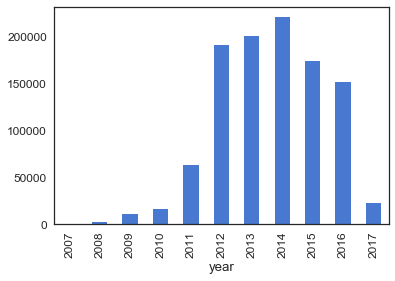

In [37]:
# number of entries created by years
df = pd.DataFrame(list(mannheim.aggregate([
    {'$project': {'year': {'$substr': ['$created.timestamp', 0, 4]}}},
    {'$group': {'_id': '$year', 'count': {'$sum': 1}}},
    {'$sort': {'_id': 1}},
    {'$project': {'_id': 0, 'year': '$_id', 'count': 1}}
])))
df.set_index(['year'], inplace=True)

print('number of entries created by years:\n{0}'.format(df))
df['count'].plot.bar()

## Conclusion

With the combination of OpenStreetMap map data and MongoDB it was surprisingly easy to dig into the data and to find out some really interesting facts. Compared to the MongoDB case study exmaple in the online course the data from Mannheim looks relatively clean and are 'mostly' consistent.

It seems that there was a great increase in active users (or bots) starting from 2012 and have updated the map of Mannheim more actively since then. 

There are some open questions left, which should be analyzed in future work:
* In the additional ideas section I experienced that the imported data is lacking information about the relationships between the different nodes and ways which are actually included in the original map data.  This element contains additional information about the relations between the other elements such as nodes and ways. 
    * A practical example for a relation is hiking route which combines many ways and nodes to a hiking map: 
```xml
<relation>
    <member ref="610900921" role="hikingmap" type="node" />
    <member ref="29372528" role="" type="way" />
    <!-- ... other nodes and ways ... -->
    <tag k="name" v="Rundweg 5, Waldschulweg" />
    <tag k="route" v="hiking" />
    <tag k="operator" v="Odenwaldklub" />
    <tag k="distance" v="5.7" />
</relation>
```
    * The implementation to include the 'relation' elements using MongoDB is relatively easy. Since MongoDB has a flexible schema, we can use a separate relation collection to store these many-to-many relationship. The relation document can use references to describe relationships between connected data and use nested element structure for faster query performance. (see [MongoDB Data Models Relationships](https://docs.mongodb.com/manual/applications/data-models-relationships/))
* In Germany the government has started to publish [open data](https://mannheim.opendatasoft.com/explore) containing information about the demographical distribution, the public services etc. in the cities. We could enrich the database using these metadata.
    * The extra information about the districts and cities can be implemented using ['multipolygon' relations](http://wiki.openstreetmap.org/wiki/Relation:multipolygon). To display them we can utilize additional layers on top of the map.
* When checking for bars and restaurants manually we realized that not all opening times were consistent with the numbers on google maps, tripadvisor or yelp. Moreover, some entries have missing address information or phone numbers. Maybe we could expand or audit the POIs using some external services publicly available.
    * A way to do that is employ an automatic bot system which checks for updates on external services e.g. google maps periodically and updates or synchronizes the POI data in the database.
    * The difficulties may be beyond the implementation scope. Above all, since OpenStreetMaps is an open source project, there could be issues with data licensing or copyright.
    

## References

* [Udacity Website](udacity.com)
* [Pandas Documentation](http://pandas.pydata.org/pandas-docs/stable/)
* [OpenStreetMap XML Structure](https://wiki.openstreetmap.org/wiki/OSM_XML](https://wiki.openstreetmap.org/wiki/OSM_XML)
* [OpenStreetMap Map Elements](https://wiki.openstreetmap.org/wiki/Elements](https://wiki.openstreetmap.org/wiki/Elements)
* [MongoDB Manual](https://docs.mongodb.com/manual/)
* [PyMongo Documentation](https://api.mongodb.com/python/current/)

## Reproduction Environment

In [38]:
import IPython
print IPython.sys_info()

{'commit_hash': u'5c9c918',
 'commit_source': 'installation',
 'default_encoding': 'cp936',
 'ipython_path': 'C:\\dev\\anaconda\\lib\\site-packages\\IPython',
 'ipython_version': '5.1.0',
 'os_name': 'nt',
 'platform': 'Windows-7-6.1.7601-SP1',
 'sys_executable': 'C:\\dev\\anaconda\\python.exe',
 'sys_platform': 'win32',
 'sys_version': '2.7.13 |Anaconda custom (32-bit)| (default, Dec 19 2016, 13:36:02) [MSC v.1500 32 bit (Intel)]'}


In [39]:
!pip freeze

alabaster==0.7.9
anaconda-client==1.6.0
anaconda-navigator==1.4.3
argcomplete==1.0.0
astroid==1.4.9
astropy==1.3
Babel==2.3.4
backports-abc==0.5
backports.shutil-get-terminal-size==1.0.0
backports.ssl-match-hostname==3.4.0.2
beautifulsoup4==4.5.3
bitarray==0.8.1
blaze==0.10.1
bokeh==0.12.4
boto==2.45.0
Bottleneck==1.2.0
cdecimal==2.3
cffi==1.9.1
chardet==2.3.0
chest==0.2.3
click==6.7
cloudpickle==0.2.2
clyent==1.2.2
colorama==0.3.7
comtypes==1.1.2
conda==4.3.15
configobj==5.0.6
configparser==3.5.0
contextlib2==0.5.4
cryptography==1.7.1
cycler==0.10.0
Cython==0.25.2
cytoolz==0.8.2
dask==0.13.0
datashape==0.5.4
decorator==4.0.11
dill==0.2.5
docutils==0.13.1
enum34==1.1.6
et-xmlfile==1.0.1
fastcache==1.0.2
Flask==0.12
Flask-Cors==3.0.2
funcsigs==1.0.2
functools32==3.2.3.post2
futures==3.0.5
gevent==1.2.1
glueviz==0.9.1
greenlet==0.4.11
grin==1.2.1
h5py==2.6.0
HeapDict==1.0.0
idna==2.2
imagesize==0.7.1
ipaddress==1.0.18
ipykernel==4.5.2
ipython==5.1.0
ipython-genutils==0.1.0
ipywidgets==5.